<a href="https://colab.research.google.com/github/20173132hanaram/-/blob/master/01_linear_regression_using_tensorflow_homework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

import numpy as np
import matplotlib.pyplot as plt

Instructions for updating:
non-resource variables are not supported in the long term


In [3]:
x_train = [1, 2, 3, 4, 5]
y_train = [3, 5, 7, 9, 11]

signal_length = len(x_train)
y_noise = np.random.normal(0, 1, signal_length)

y_train = y_train + y_noise

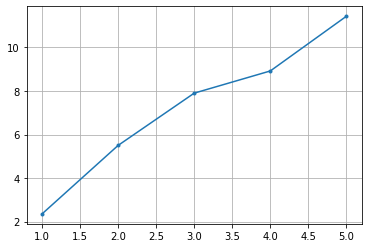

In [4]:
plt.plot(x_train, y_train,'.-')
plt.grid()

In [49]:
x_train = [2, 3, 5, 8, 11]
y_train = [4, 7, 10, 13, 16]

signal_length = len(x_train)
y_noise = np.random.normal(0, 1, signal_length)

y_train = y_train + y_noise

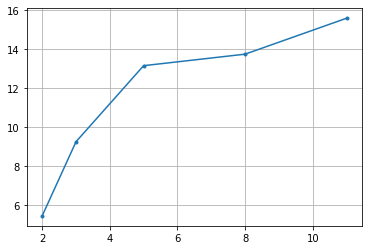

In [50]:
plt.plot(x_train, y_train,'.-')
plt.grid()

In [8]:
useRandom = False

In [37]:
if useRandom:
    W = tf.Variable(tf.random_normal([1]), name='weight')
    b = tf.Variable(tf.random_normal([1]), name='bias')
else:
    w0 = 15.0;
    b0 = 7.0;

    W = tf.Variable(w0*tf.ones([1]), name='weight')
    b = tf.Variable(b0*tf.ones([1]), name='bias')

In [38]:
hypothesis = x_train * W + b

In [39]:
loss = tf.reduce_mean(tf.square(hypothesis - y_train))

**OPtimizer**

In [40]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)
train = optimizer.minimize(loss)

**Initializes** global variables in the graph.

In [41]:
sess = tf.Session()

In [42]:
sess.run(tf.global_variables_initializer())

In [43]:
nb_epoch = 1001
vloss = [] #empty list
vb = [] #empty list
vw = [] #empty list
for step in range(nb_epoch):
    sess.run(train)
    loss1 = sess.run(loss)
    vloss.append(loss1)
    
    if step % 50 == 0: # 5번마다
        w1 = sess.run(W)[0] # 기울기
        b1 = sess.run(b)[0] # bias
        
        print(step,'\t', loss1, '\t', w1, '\t',b1)

0 	 1454.0406 	 11.692018 	 6.0755367
50 	 1.0426565 	 1.109924 	 2.7677038
100 	 0.85460395 	 1.1917325 	 2.472292
150 	 0.72057503 	 1.2608101 	 2.2229002
200 	 0.6250502 	 1.3191271 	 2.0123575
250 	 0.55696756 	 1.36836 	 1.8346107
300 	 0.50844395 	 1.4099238 	 1.6845523
350 	 0.47386003 	 1.4450132 	 1.5578686
400 	 0.44921166 	 1.4746363 	 1.4509193
450 	 0.43164414 	 1.499645 	 1.3606299
500 	 0.41912374 	 1.5207579 	 1.2844055
550 	 0.41019997 	 1.5385822 	 1.2200545
600 	 0.40383998 	 1.5536299 	 1.1657281
650 	 0.39930707 	 1.5663334 	 1.1198636
700 	 0.39607638 	 1.5770581 	 1.0811442
750 	 0.3937738 	 1.5861121 	 1.0484562
800 	 0.3921327 	 1.5937558 	 1.02086
850 	 0.3909631 	 1.6002089 	 0.9975626
900 	 0.39012942 	 1.6056566 	 0.9778944
950 	 0.38953522 	 1.6102557 	 0.96129
1000 	 0.38911194 	 1.6141385 	 0.947272


Text(0, 0.5, 'loss')

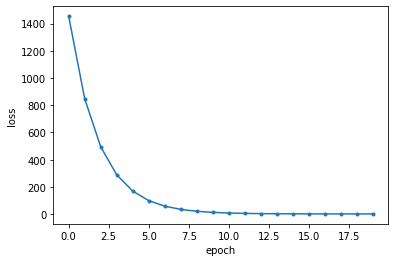

In [44]:
plt.plot(vloss[:20],'.-')
plt.xlabel('epoch')
plt.ylabel('loss')

In [45]:
w1 = sess.run(W)[0] # 기울기
b1 = sess.run(b)[0] # bias

In [46]:
print(w1, b1)

1.6141385 0.947272


In [47]:
str1 = 'y = ' + str(w1) +'x + ' + str(b1)
print(str1)

y = 1.6141385x + 0.947272


Text(0.5, 1.0, 'y = 1.6141385x + 0.947272')

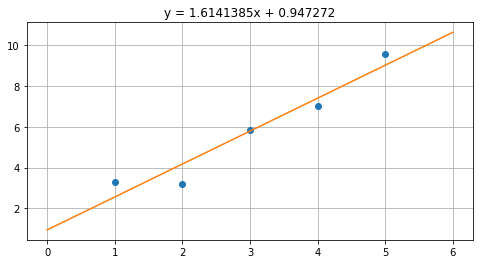

In [48]:
plt.figure(figsize=(8,4)) # figsize를 바꾸어보세요
plt.plot(x_train, y_train,'o') #train data 그리기

# 직선 그래프를 그리기 위한 코드
# 그래프의 x좌표를 일정 간격으로 설정함
x1 = np.linspace(np.min(x_train)-1, np.max(x_train)+1)
y1 = w1*x1 + b1
plt.plot(x1, y1)

plt.grid() # 격자
#plt.axis((np.min(x_train) - 1, np.max(x_train) + 1, np.min(y_train) - 1, np.max(y_train) + 1))
plt.title(str1)